In [1]:
import pandas as pd
import numpy as np
import os
import datetime

In [2]:
from endless_line.data_utils.dataloader import DataLoader

# Data Loading

In [3]:
data = DataLoader(data_dir_path="data", load_all_files=True)

In [4]:
data.clean_data()

c:\Users\Henri Mayoud\Documents\études\ESSEC-Centrale\cours Y2\T2\hackathon\git_\Hackathon-ElevenStrategy\endless_line\data_utils\dataloader.py:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.parade_night_show_attendance["Num_parade"] = 3 - self.parade_night_show_attendance[["NIGHT_SHOW",	"PARADE_1",	"PARADE_2"]].isna().sum(axis=1)


In [5]:
data.data_preprocessing()

### Manual loading

In [22]:
dir_path= "data"
dir_path = os.path.join(os.getcwd(), dir_path)
dir_path

'c:\\Users\\Henri Mayoud\\Documents\\études\\ESSEC-Centrale\\cours Y2\\T2\\hackathon\\git_\\Hackathon-ElevenStrategy\\data'

In [6]:
attendance = pd.read_csv(os.path.join(dir_path,"attendance.csv"))
entity_schedule = pd.read_csv(os.path.join(dir_path,"entity_schedule.csv"))
link_attraction_park = pd.read_csv(os.path.join(dir_path,"link_attraction_park.csv"), sep=";")
waiting_times = pd.read_csv(os.path.join(dir_path,"waiting_times.csv"))
weather_data = pd.read_csv(os.path.join(dir_path,"weather_data.csv"))

In [23]:
glossary = pd.read_excel(os.path.join(dir_path,"glossary.xlsx"))
parade_night_show = pd.read_excel(os.path.join(dir_path,"parade_night_show.xlsx"))

# PREPROCESSING

## Attendance

In [17]:
data.attendance.head()

,USAGE_DATE,FACILITY_NAME,attendance
0,2018-06-01,PortAventura World,46804
2,2018-06-02,PortAventura World,57940
4,2018-06-03,PortAventura World,44365
6,2018-06-04,PortAventura World,37617
8,2018-06-05,PortAventura World,32438


In [18]:
data.attendance.dtypes

USAGE_DATE       object
FACILITY_NAME    object
attendance        int64
dtype: object

In [19]:
data.attendance["USAGE_DATE"] = data.attendance["USAGE_DATE"].astype("datetime64[s]")
data.attendance.dtypes


USAGE_DATE       datetime64[s]
FACILITY_NAME           object
attendance               int64
dtype: object

## Entity Schedule

In [7]:
data.entity_schedule.head()

,WORK_DATE,ENTITY_DESCRIPTION_SHORT,IS_OPEN
1,2022-04-07,Dizzy Dropper,1
6,2018-07-17,PortAventura World,1
11,2019-02-28,PortAventura World,1
12,2018-02-21,Kiddie Coaster,0
13,2019-08-18,PortAventura World,1


In [5]:
data.entity_schedule_pivot.head()

ENTITY_DESCRIPTION_SHORT,WORK_DATE,Bumper Cars,Bungee Jump,Circus Train,Crazy Dance,Dizzy Dropper,Drop Tower,Flying Coaster,Free Fall,Giant Wheel,...,Oz Theatre,PortAventura World,Rapids Ride,Roller Coaster,Spinning Coaster,Spiral Slide,Superman Ride,Swing Ride,Water Ride,Zipline
0,2018-01-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2018-01-02,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2018-01-03,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2018-01-04,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2018-01-05,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [63]:
data.entity_schedule.iloc[100:110]

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE
172,NaN,Bungee Jump,ATTR,2022-04-01 09:30:00,2022-04-01 21:01:00,2022-04-02 08:01:13,2022-04-01
176,NaN,Water Ride,ATTR,2019-03-05 10:00:00,2019-03-05 18:43:00,2019-03-06 07:41:37,2019-03-05
177,NaN,Dizzy Dropper,ATTR,2019-01-06 08:00:00,2019-01-06 20:13:00,2019-01-07 07:36:26,2019-01-06
178,NaN,Rapids Ride,ATTR,2019-11-12 09:36:00,2019-11-12 17:07:00,2019-11-13 07:39:31,2019-11-12
181,NaN,Swing Ride,ATTR,2018-05-12 08:30:00,2018-05-12 21:43:00,2018-05-13 07:41:17,2018-05-12
182,NaN,Bumper Cars,ATTR,2022-08-15 09:27:00,2022-08-15 22:17:00,2022-08-16 07:23:33,2022-08-15
183,NaN,PortAventura World,PARK,2022-07-30 08:30:00,2022-07-30 09:30:00,2022-07-31 07:48:15,2022-07-30
185,NaN,Free Fall,ATTR,2019-08-29 10:00:00,2019-08-29 20:21:00,2019-08-30 07:48:41,2019-08-29
186,NaN,Giga Coaster,ATTR,2018-01-26 09:30:00,2018-01-26 18:00:00,2018-01-27 08:54:18,2018-01-26
189,NaN,Drop Tower,ATTR,2018-12-22 08:00:00,2018-12-22 21:26:00,2018-12-23 07:53:43,2018-12-22


In [69]:
data.entity_schedule[data.entity_schedule['ENTITY_DESCRIPTION_SHORT']=='Spinning Coaster']['DEB_TIME'].unique()

<DatetimeArray>
['2018-10-27 08:30:00', '2019-11-21 09:13:00', '2018-07-06 10:00:00',
 '2022-06-23 09:26:00', '2022-05-06 09:23:00', '2018-11-18 07:58:00',
 '2019-04-19 08:28:00', '2019-12-17 09:28:00', '2018-08-05 08:34:00',
 '2018-05-06 08:30:00',
 ...
 '2018-01-03 08:58:00', '2018-01-14 09:35:00', '2019-07-24 09:01:00',
 '2018-12-25 08:01:00', '2019-09-06 09:22:00', '2022-08-21 09:30:00',
 '2022-08-20 09:22:00', '2022-08-19 09:30:00', '2022-08-17 09:30:00',
 '2022-08-18 09:30:00']
Length: 872, dtype: datetime64[s]

In [6]:
data.entity_schedule.dtypes

REF_CLOSING_DESCRIPTION            object
ENTITY_DESCRIPTION_SHORT           object
ENTITY_TYPE                        object
DEB_TIME                    datetime64[s]
FIN_TIME                    datetime64[s]
UPDATE_TIME                 datetime64[s]
WORK_DATE                   datetime64[s]
dtype: object

In [7]:
data.entity_schedule["REF_CLOSING_DESCRIPTION"].unique()

array([nan, 'Fermeture Réhab', 'Fermeture Opérationnelle'], dtype=object)

In [9]:
data.entity_schedule["ENTITY_DESCRIPTION_SHORT"].unique()

array(['Dizzy Dropper', 'PortAventura World', 'Kiddie Coaster',
       'Oz Theatre', 'Giga Coaster', 'Inverted Coaster', 'Himalaya Ride',
       'Water Ride', 'Spinning Coaster', 'Swing Ride', 'Bungee Jump',
       'Rapids Ride', 'Free Fall', 'Spiral Slide', 'Superman Ride',
       'Drop Tower', 'Merry Go Round', 'Bumper Cars', 'Giant Wheel',
       'Flying Coaster', 'Go-Karts', 'Haunted House', 'Zipline',
       'Roller Coaster', 'Crazy Dance', 'Circus Train', 'Vertical Drop'],
      dtype=object)

In [9]:
data.entity_schedule["ENTITY_TYPE"].unique()

array(['ATTR', 'PARK'], dtype=object)

In [ ]:
data.entity_schedule["ENTITY_TYPE"].unique()

### Some bullshit that I wasted too much time on

In [5]:
def round_to_quarter(dt, down=True):
		"""
			Takes datetime.time as input (e.g. 9:10).
			Rounds in down to the lower round time (e.g. 9:00).
			Returns a datetime.time
		"""
		minutes = dt.hour * 60 + dt.minute  # Convert time to total minutes
		minutes += 0 if down else 14  # rounding down => nothing to do. rounding up => add 14
		rounded_minutes = (minutes // 15) * 15  # Round down to nearest quarter
		rounded_minutes = min(rounded_minutes, 23 * 60 + 45)  # avoid going above midnight
		return dt.replace(hour=rounded_minutes // 60, minute=rounded_minutes % 60)  # return input datetime with replaced hour and minute

In [6]:
entity_schedule = data.entity_schedule.copy()

In [7]:

# rounding down deb_time
entity_schedule['DEB_TIME'] = entity_schedule['DEB_TIME'].apply(lambda t: round_to_quarter(t,down=True))
# rounding up fin_time
entity_schedule['FIN_TIME'] = entity_schedule['FIN_TIME'].apply(lambda t: round_to_quarter(t,down=False))
entity_schedule.head()

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE
1,NaN,Dizzy Dropper,ATTR,2022-04-07 08:30:00,2022-04-07 22:15:00,2022-04-08 08:00:30,2022-04-07
6,NaN,PortAventura World,PARK,2018-07-17 08:30:00,2018-07-17 09:30:00,2018-07-18 07:48:41,2018-07-17
11,NaN,PortAventura World,PARK,2019-02-28 08:30:00,2019-02-28 09:30:00,2019-03-01 09:23:40,2019-02-28
12,Fermeture Réhab,Kiddie Coaster,ATTR,2018-02-21 23:45:00,2018-02-21 23:45:00,2018-02-22 08:36:23,2018-02-21
13,NaN,PortAventura World,PARK,2019-08-18 08:30:00,2019-08-18 09:30:00,2019-08-19 07:34:17,2019-08-18


In [8]:
entity_schedule.shape

(23595, 7)

In [9]:
# TODO: create new rows with added 15min to DEB_TIME until DEB_TIME == FIN_TIME 

In [10]:
from tqdm import tqdm

In [ ]:
counter = 0
new_rows = []
for index, row in tqdm(entity_schedule.iterrows(), total=entity_schedule.shape[0]):
    new_row = row.copy()
    while new_row['DEB_TIME'] != new_row['FIN_TIME']:
        new_row = new_row.copy()
        new_row['DEB_TIME'] += np.timedelta64(15, 'm')
        new_rows.append(new_row)
        counter += 1

23595it [01:11, 330.54it/s]


In [11]:
counter = 0
def generate_new_rows(entity_schedule):
    global counter
    for index, row in tqdm(entity_schedule.iterrows(), total=entity_schedule.shape[0]):
        new_row = row.copy()
        while new_row['DEB_TIME'] != new_row['FIN_TIME']:
            new_row = new_row.copy()
            new_row['DEB_TIME'] += np.timedelta64(15, 'm')
            counter += 1
            yield new_row

In [12]:
new_rows = list(generate_new_rows(entity_schedule))

100%|██████████| 23595/23595 [01:08<00:00, 346.07it/s]


In [ ]:
counter

In [13]:
new_rows_df = pd.DataFrame(new_rows)

In [ ]:
new_rows_df.shape

In [ ]:
new_rows_df.head()

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE
1,NaN,Dizzy Dropper,ATTR,2022-04-07 08:45:00,2022-04-07 22:15:00,2022-04-08 08:00:30,2022-04-07
1,NaN,Dizzy Dropper,ATTR,2022-04-07 09:00:00,2022-04-07 22:15:00,2022-04-08 08:00:30,2022-04-07
1,NaN,Dizzy Dropper,ATTR,2022-04-07 09:15:00,2022-04-07 22:15:00,2022-04-08 08:00:30,2022-04-07
1,NaN,Dizzy Dropper,ATTR,2022-04-07 09:30:00,2022-04-07 22:15:00,2022-04-08 08:00:30,2022-04-07
1,NaN,Dizzy Dropper,ATTR,2022-04-07 09:45:00,2022-04-07 22:15:00,2022-04-08 08:00:30,2022-04-07


In [14]:
entity_schedule = pd.concat([entity_schedule, new_rows_df], ignore_index=True)

In [12]:
def generate_and_concat(df):
    new_rows = list(generate_new_rows(entity_schedule))
    new_rows_df = pd.DataFrame(new_rows)
    return pd.concat([df, new_rows_df], ignore_index=True)

In [13]:
entity_schedule = generate_and_concat(entity_schedule)

100%|██████████| 23595/23595 [01:11<00:00, 332.12it/s]


In [14]:
entity_schedule.shape

(941192, 7)

In [18]:
entity_schedule = entity_schedule.sort_values(['ENTITY_DESCRIPTION_SHORT', 'DEB_TIME'])

In [19]:
# TODO: remove when DEB_TIME == FIN_TIME
entity_schedule = entity_schedule[entity_schedule['DEB_TIME'] != entity_schedule['FIN_TIME']]

In [20]:
entity_schedule.shape

(917597, 7)

### New cleaning

In [34]:


# TODO: one-hot encode closing
"""applyer = {
    'Fermeture Opérationnelle': 1,
    'Fermeture Réhab': 1
}
entity_schedule['REF_CLOSING_DESCRIPTION'] = entity_schedule['REF_CLOSING_DESCRIPTION'].apply(lambda x: applyer[x])
"""
# OR
entity_schedule['IS_OPEN'] = entity_schedule['REF_CLOSING_DESCRIPTION'].isnull()


In [36]:
entity_schedule[entity_schedule['IS_OPEN'] == 1].head()

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE,IS_CLOSED,IS_OPEN
19726,NaN,Bumper Cars,ATTR,2018-01-01 08:30:00,2018-01-01 21:15:00,2018-01-02 07:51:31,2018-01-01,0,True
791889,NaN,Bumper Cars,ATTR,2018-01-01 08:45:00,2018-01-01 21:15:00,2018-01-02 07:51:31,2018-01-01,0,True
791890,NaN,Bumper Cars,ATTR,2018-01-01 09:00:00,2018-01-01 21:15:00,2018-01-02 07:51:31,2018-01-01,0,True
791891,NaN,Bumper Cars,ATTR,2018-01-01 09:15:00,2018-01-01 21:15:00,2018-01-02 07:51:31,2018-01-01,0,True
791892,NaN,Bumper Cars,ATTR,2018-01-01 09:30:00,2018-01-01 21:15:00,2018-01-02 07:51:31,2018-01-01,0,True


In [55]:
test = data.entity_schedule.copy()
test['IS_OPEN'] = test['REF_CLOSING_DESCRIPTION'].isnull()
#test[(test['IS_OPEN'] == 0) & (test['DEB_TIME'] != test['FIN_TIME']) & ()].shape
#test[(test['IS_OPEN'] == 0)].shape
print(test[(test['IS_OPEN'] == 0)].shape)
print(test[(test['IS_OPEN'] == 0) & (test['DEB_TIME'].dt.time == pd.to_datetime('23:59:00').time())].shape)
test[(test['IS_OPEN'] == 0) & (test['DEB_TIME'].dt.time != pd.to_datetime('23:59:00').time())]

(2674, 8)
(2667, 8)


,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE,IS_OPEN
2455,Fermeture Opérationnelle,Merry Go Round,ATTR,2019-04-29 01:00:00,2019-04-29 01:00:00,2019-04-30 07:42:36,2019-04-29,False
3173,Fermeture Opérationnelle,Merry Go Round,ATTR,2019-04-30 01:00:00,2019-04-30 01:00:00,2019-05-01 07:40:37,2019-04-30,False
13479,Fermeture Réhab,Superman Ride,ATTR,2019-01-16 01:00:00,2019-01-16 01:00:00,2019-01-17 08:14:58,2019-01-16,False
18016,Fermeture Réhab,Oz Theatre,ATTR,2018-07-01 01:00:00,2018-07-01 01:00:00,2018-07-02 07:35:29,2018-07-01,False
24727,Fermeture Opérationnelle,Merry Go Round,ATTR,2019-04-26 01:00:00,2019-04-26 01:00:00,2019-04-27 09:26:40,2019-04-26,False
25237,Fermeture Réhab,Superman Ride,ATTR,2019-01-17 01:00:00,2019-01-17 01:00:00,2019-01-18 09:05:42,2019-01-17,False
27033,Fermeture Opérationnelle,Himalaya Ride,ATTR,2019-07-15 01:00:00,2019-07-15 01:00:00,2019-07-16 07:41:56,2019-07-15,False


In [56]:
test[(test['IS_OPEN'] == 0) & (test['DEB_TIME'].dt.time == pd.to_datetime('23:59:00').time())].head()

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE,IS_OPEN
12,Fermeture Réhab,Kiddie Coaster,ATTR,2018-02-21 23:59:00,2018-02-21 23:59:00,2018-02-22 08:36:23,2018-02-21,False
14,Fermeture Opérationnelle,Oz Theatre,ATTR,2018-09-04 23:59:00,2018-09-04 23:59:00,2018-09-05 08:12:54,2018-09-04,False
18,Fermeture Opérationnelle,Oz Theatre,ATTR,2018-06-24 23:59:00,2018-06-24 23:59:00,2018-06-25 08:03:37,2018-06-24,False
33,Fermeture Réhab,Bungee Jump,ATTR,2018-10-10 23:59:00,2018-10-10 23:59:00,2018-10-11 08:45:11,2018-10-10,False
60,Fermeture Réhab,Bumper Cars,ATTR,2018-07-19 23:59:00,2018-07-19 23:59:00,2018-07-20 08:01:38,2018-07-19,False


In [60]:
len(test['ENTITY_DESCRIPTION_SHORT'].unique())

27

In [62]:
27 * 365 * 3

29565

In [74]:
# TODO: index attraction & work_data

entity_schedule = data.entity_schedule.copy()
entity_schedule['IS_OPEN'] = entity_schedule['REF_CLOSING_DESCRIPTION'].isnull().astype(int)
entity_schedule.head()

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE,IS_OPEN
1,NaN,Dizzy Dropper,ATTR,2022-04-07 08:30:00,2022-04-07 22:04:00,2022-04-08 08:00:30,2022-04-07,1
6,NaN,PortAventura World,PARK,2018-07-17 08:30:00,2018-07-17 09:30:00,2018-07-18 07:48:41,2018-07-17,1
11,NaN,PortAventura World,PARK,2019-02-28 08:30:00,2019-02-28 09:30:00,2019-03-01 09:23:40,2019-02-28,1
12,Fermeture Réhab,Kiddie Coaster,ATTR,2018-02-21 23:59:00,2018-02-21 23:59:00,2018-02-22 08:36:23,2018-02-21,0
13,NaN,PortAventura World,PARK,2019-08-18 08:30:00,2019-08-18 09:30:00,2019-08-19 07:34:17,2019-08-18,1


In [75]:
# TODO: 
entity_schedule_pivot = pd.pivot_table(entity_schedule, values='IS_OPEN', index=['WORK_DATE'], columns=['ENTITY_DESCRIPTION_SHORT'])

In [76]:
entity_schedule_pivot.head()

ENTITY_DESCRIPTION_SHORT,Bumper Cars,Bungee Jump,Circus Train,Crazy Dance,Dizzy Dropper,Drop Tower,Flying Coaster,Free Fall,Giant Wheel,Giga Coaster,...,PortAventura World,Rapids Ride,Roller Coaster,Spinning Coaster,Spiral Slide,Superman Ride,Swing Ride,Vertical Drop,Water Ride,Zipline
WORK_DATE,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
2018-01-02,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
2018-01-03,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
2018-01-04,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
2018-01-05,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0


In [79]:
entity_schedule_pivot.shape

(872, 27)

In [78]:
entity_schedule_pivot[entity_schedule_pivot.isna().any(axis=1)]

ENTITY_DESCRIPTION_SHORT,Bumper Cars,Bungee Jump,Circus Train,Crazy Dance,Dizzy Dropper,Drop Tower,Flying Coaster,Free Fall,Giant Wheel,Giga Coaster,...,PortAventura World,Rapids Ride,Roller Coaster,Spinning Coaster,Spiral Slide,Superman Ride,Swing Ride,Vertical Drop,Water Ride,Zipline
WORK_DATE,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
2018-01-02,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
2018-01-03,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
2018-01-04,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
2018-01-05,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-26,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
2022-06-27,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
2022-06-28,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0


In [89]:
#entity_schedule_pivot[entity_schedule_pivot['Vertical Drop'].notnull()]['']

In [96]:
test = entity_schedule_pivot.reset_index()
test.head()

ENTITY_DESCRIPTION_SHORT,WORK_DATE,Bumper Cars,Bungee Jump,Circus Train,Crazy Dance,Dizzy Dropper,Drop Tower,Flying Coaster,Free Fall,Giant Wheel,...,PortAventura World,Rapids Ride,Roller Coaster,Spinning Coaster,Spiral Slide,Superman Ride,Swing Ride,Vertical Drop,Water Ride,Zipline
0,2018-01-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
1,2018-01-02,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
2,2018-01-03,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
3,2018-01-04,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
4,2018-01-05,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0


In [97]:
test[(test['WORK_DATE'] >= '2018-05-10') & (test['WORK_DATE'] <= '2018-06-01')]['Oz Theatre']

129    0.0
130    0.0
131    0.0
132    0.0
133    0.0
134    0.0
135    0.0
136    0.0
137    0.0
138    0.0
139    NaN
140    0.0
141    0.0
142    0.0
143    0.0
144    NaN
145    0.0
146    0.0
147    0.0
148    0.0
149    0.0
150    0.0
151    0.0
Name: Oz Theatre, dtype: float64

In [98]:
test = test.drop(columns='Vertical Drop')

In [ ]:
test = test.bfill() # backfill na values

In [100]:
test[(test['WORK_DATE'] >= '2018-05-10') & (test['WORK_DATE'] <= '2018-06-01')]['Oz Theatre']

129    0.0
130    0.0
131    0.0
132    0.0
133    0.0
134    0.0
135    0.0
136    0.0
137    0.0
138    0.0
139    0.0
140    0.0
141    0.0
142    0.0
143    0.0
144    0.0
145    0.0
146    0.0
147    0.0
148    0.0
149    0.0
150    0.0
151    0.0
Name: Oz Theatre, dtype: float64

In [81]:
check = entity_schedule_pivot.drop(columns=['Vertical Drop'])
check[check.isna().any(axis=1)]

ENTITY_DESCRIPTION_SHORT,Bumper Cars,Bungee Jump,Circus Train,Crazy Dance,Dizzy Dropper,Drop Tower,Flying Coaster,Free Fall,Giant Wheel,Giga Coaster,...,Oz Theatre,PortAventura World,Rapids Ride,Roller Coaster,Spinning Coaster,Spiral Slide,Superman Ride,Swing Ride,Water Ride,Zipline
WORK_DATE,,,,,,,,,,,,,,,,,,,,,
2018-05-20,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2018-05-25,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [12]:
entity_schedule = pd.get_dummies(data.entity_schedule, columns=['REF_CLOSING_DESCRIPTION'], dtype=int)

In [13]:
entity_schedule.head()

,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE,REF_CLOSING_DESCRIPTION_Fermeture Opérationnelle,REF_CLOSING_DESCRIPTION_Fermeture Réhab
1,Dizzy Dropper,ATTR,2022-04-07 08:30:00,2022-04-07 22:04:00,2022-04-08 08:00:30,2022-04-07,0,0
6,PortAventura World,PARK,2018-07-17 08:30:00,2018-07-17 09:30:00,2018-07-18 07:48:41,2018-07-17,0,0
11,PortAventura World,PARK,2019-02-28 08:30:00,2019-02-28 09:30:00,2019-03-01 09:23:40,2019-02-28,0,0
12,Kiddie Coaster,ATTR,2018-02-21 23:59:00,2018-02-21 23:59:00,2018-02-22 08:36:23,2018-02-21,0,1
13,PortAventura World,PARK,2019-08-18 08:30:00,2019-08-18 09:30:00,2019-08-19 07:34:17,2019-08-18,0,0


## Link Attraction Park

In [15]:
attractions = data.link_attraction_park['ATTRACTION'].tolist()
test_entity_schedule = data.entity_schedule[data.entity_schedule['ENTITY_DESCRIPTION_SHORT'].isin(attractions + ['PortAventura World'])]
test_entity_schedule.head()
		

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE
1,NaN,Dizzy Dropper,ATTR,2022-04-07 08:30:00,2022-04-07 22:04:00,2022-04-08 08:00:30,2022-04-07
2,NaN,Sling Shot,ATTR,2018-03-28 08:37:00,2018-03-28 18:12:00,2018-03-29 08:24:37,2018-03-28
3,NaN,Gondola,ATTR,2019-04-11 09:55:00,2019-04-11 20:19:00,2019-04-12 08:59:29,2019-04-11
4,NaN,Monorail,ATTR,2019-06-29 08:30:00,2019-06-29 20:35:00,2019-06-30 08:14:16,2019-06-29
5,Fermeture Réhab,Top Spin,ATTR,2019-04-07 23:59:00,2019-04-07 23:59:00,2019-04-08 07:40:04,2019-04-07


In [8]:
data.link_attraction_park.head()

,ATTRACTION,PARK
0,Aeroplane Ride,Tivoli Gardens
1,Bumper Cars,PortAventura World
2,Bungee Jump,PortAventura World
3,Circus Train,PortAventura World
4,Crazy Bus,Tivoli Gardens


In [9]:
data.link_attraction_park.dtypes

ATTRACTION    object
PARK          object
dtype: object

In [8]:
test = data.link_attraction_park.merge(data.entity_schedule, left_on="ATTRACTION", right_on="ENTITY_DESCRIPTION_SHORT")
test.head()

,ATTRACTION,PARK,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE
0,Bumper Cars,PortAventura World,Fermeture Réhab,Bumper Cars,ATTR,2018-07-19 23:59:00,2018-07-19 23:59:00,2018-07-20 08:01:38,2018-07-19
1,Bumper Cars,PortAventura World,NaN,Bumper Cars,ATTR,2022-08-15 09:27:00,2022-08-15 22:17:00,2022-08-16 07:23:33,2022-08-15
2,Bumper Cars,PortAventura World,NaN,Bumper Cars,ATTR,2020-01-17 08:30:00,2020-01-17 17:47:00,2020-01-18 07:38:22,2020-01-17
3,Bumper Cars,PortAventura World,NaN,Bumper Cars,ATTR,2019-08-10 08:30:00,2019-08-10 22:17:00,2019-08-11 08:16:57,2019-08-10
4,Bumper Cars,PortAventura World,NaN,Bumper Cars,ATTR,2018-01-21 08:30:00,2018-01-21 19:11:00,2018-01-22 08:44:49,2018-01-21


In [9]:
test[test["PARK"] != 'PortAventura World']

,ATTRACTION,PARK,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE


In [10]:
test.shape

(23351, 9)

## Waiting Times

In [15]:
data.waiting_times.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT
0,2018-01-01,2018-01-01 21:00:00.000,21,2018-01-01 21:15:00.000,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0
1,2018-01-01,2018-01-01 19:30:00.000,19,2018-01-01 19:45:00.000,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0
2,2018-01-01,2018-01-01 22:30:00.000,22,2018-01-01 22:45:00.000,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0
3,2018-01-01,2018-01-01 12:45:00.000,12,2018-01-01 13:00:00.000,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0
4,2018-01-01,2018-01-01 17:00:00.000,17,2018-01-01 17:15:00.000,Skyway,5,15.0,92.0,211.500,198.25,15,15,0,16.0


In [18]:
data.waiting_times.shape

(3509324, 14)

In [17]:
data.waiting_times[(data.waiting_times['CAPACITY']==0) & (data.waiting_times['WAIT_TIME_MAX']!=0) ]

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT
5,2018-01-01,2018-01-01 18:15:00.000,18,2018-01-01 18:30:00.000,Free Fall,50,3.0,0.0,0.0,0.0,0,0,0,3.0
18,2018-01-01,2018-01-01 21:30:00.000,21,2018-01-01 21:45:00.000,Water Ride,15,10.0,0.0,0.0,0.0,0,0,0,11.0
61,2018-01-01,2018-01-01 22:00:00.000,22,2018-01-01 22:15:00.000,Swing Ride,25,12.0,0.0,0.0,0.0,0,0,0,12.0
201,2018-01-01,2018-01-01 21:15:00.000,21,2018-01-01 21:30:00.000,Water Ride,15,10.0,0.0,0.0,0.0,0,0,0,11.0
211,2018-01-01,2018-01-01 21:00:00.000,21,2018-01-01 21:15:00.000,Haunted House,10,9.0,0.0,0.0,0.0,0,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3508718,2022-08-18,2022-08-18 09:15:00.000,9,2022-08-18 09:30:00.000,Spinning Coaster,5,5.4,0.0,0.0,0.0,0,0,0,6.0
3508853,2022-08-18,2022-08-18 22:00:00.000,22,2022-08-18 22:15:00.000,Circus Train,5,1.0,0.0,0.0,0.0,0,0,0,1.0
3508885,2022-08-18,2022-08-18 21:45:00.000,21,2022-08-18 22:00:00.000,Circus Train,5,1.0,0.0,0.0,0.0,0,0,0,1.0
3509012,2022-08-18,2022-08-18 22:00:00.000,22,2022-08-18 22:15:00.000,Haunted House,20,9.0,0.0,0.0,0.0,0,0,0,9.0


In [19]:
waiting_times.dtypes

WORK_DATE                    object
DEB_TIME                     object
DEB_TIME_HOUR                 int64
FIN_TIME                     object
ENTITY_DESCRIPTION_SHORT     object
WAIT_TIME_MAX                 int64
NB_UNITS                    float64
GUEST_CARRIED               float64
CAPACITY                    float64
ADJUST_CAPACITY             float64
OPEN_TIME                     int64
UP_TIME                       int64
DOWNTIME                      int64
NB_MAX_UNIT                 float64
dtype: object

In [20]:
waiting_times["WORK_DATE"] = waiting_times["WORK_DATE"].astype("datetime64[s]")
waiting_times["DEB_TIME"] = waiting_times["DEB_TIME"].astype("datetime64[s]")
waiting_times["FIN_TIME"] = waiting_times["FIN_TIME"].astype("datetime64[s]")

In [21]:
waiting_times["DEB_TIME_HOUR"].unique()

array([21, 19, 22, 12, 17, 18, 13, 15, 11, 20, 10, 14, 16,  9],
      dtype=int64)

In [22]:
waiting_times["ENTITY_DESCRIPTION_SHORT"].unique()

array(['Roller Coaster', 'Bumper Cars', 'Rapids Ride', 'Crazy Dance',
       'Skyway', 'Free Fall', 'Monorail', 'Swing Ride', 'Crazy Bus',
       'Drop Tower', 'Spinning Coaster', 'Scooby Doo', 'Superman Ride',
       'Spiral Slide', 'Inverted Coaster', 'Water Ride', 'Power Tower',
       'Top Spin', 'Log Flume', 'Oz Theatre', 'Circus Train',
       'Giant Wheel', 'Kiddie Coaster', 'Bungee Jump', 'Zipline',
       'Aeroplane Ride', 'Haunted House', 'Reverse Bungee', 'Go-Karts',
       'Dizzy Dropper', 'Merry Go Round', 'Flying Coaster', 'Gondola',
       'Pirate Ship', 'Giga Coaster', 'Himalaya Ride', 'Sling Shot',
       'Vertical Drop', 'Tilt-A-Whirl'], dtype=object)

## Weather Data

In [82]:
weather_data.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,915148800,1999-01-01 00:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,8.33,NaN,3.39,5.28,...,NaN,NaN,NaN,NaN,NaN,8,800,Clear,sky is clear,01n
1,915152400,1999-01-01 01:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,8.08,NaN,3.54,5.18,...,NaN,NaN,NaN,NaN,NaN,6,800,Clear,sky is clear,01n
2,915156000,1999-01-01 02:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,8.08,NaN,4.11,5.38,...,NaN,NaN,NaN,NaN,NaN,14,801,Clouds,few clouds,02n
3,915159600,1999-01-01 03:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,7.31,NaN,3.73,4.42,...,NaN,NaN,NaN,NaN,NaN,39,802,Clouds,scattered clouds,03n
4,915163200,1999-01-01 04:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,6.91,NaN,3.53,4.00,...,NaN,NaN,NaN,NaN,NaN,52,803,Clouds,broken clouds,04n


In [83]:
weather_data.dtypes

dt                       int64
dt_iso                  object
timezone                 int64
city_name               object
lat                    float64
lon                    float64
temp                   float64
visibility             float64
dew_point              float64
feels_like             float64
temp_min               float64
temp_max               float64
pressure                 int64
sea_level              float64
grnd_level             float64
humidity                 int64
wind_speed             float64
wind_deg                 int64
wind_gust              float64
rain_1h                float64
rain_3h                float64
snow_1h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

In [85]:
weather_data["test_time"] = weather_data["dt_iso"].astype("datetime64[s]")

DateParseError: Unknown datetime string format, unable to parse: 1999-01-01 00:00:00 +0000 UTC, at position 0

In [87]:
weather_data["lon"].unique() 

array([2.295104])

In [88]:
weather_data["city_name"].unique() 

array(['Custom location'], dtype=object)

## Parade Night Show

In [24]:
parade_night_show = parade_night_show[(parade_night_show['WORK_DATE'] < '2020-01-01') | (parade_night_show['WORK_DATE'] >= '2022-01-01')]

parade_night_show_night_show = parade_night_show[["WORK_DATE", "NIGHT_SHOW"]].rename(columns={"NIGHT_SHOW": 'show_or_parade'})
parade_night_show_parade_1 = parade_night_show[["WORK_DATE", "PARADE_1"]].rename(columns={"PARADE_1": 'show_or_parade'})
parade_night_show_parade_2 = parade_night_show[["WORK_DATE", "PARADE_2"]].rename(columns={"PARADE_2": 'show_or_parade'})


In [25]:
parade_night_show_ = pd.concat([parade_night_show_night_show, parade_night_show_parade_1, parade_night_show_parade_2])

In [26]:
# drop all rows of non-existing parade_2
parade_night_show_ = parade_night_show_.dropna(subset=['show_or_parade'])

In [27]:
parade_night_show_.head()

,WORK_DATE,show_or_parade
0,2018-10-01,20:00:00
1,2018-10-02,20:00:00
2,2018-10-03,20:00:00
3,2018-10-04,20:00:00
4,2018-10-05,20:00:00


In [28]:
parade_night_show_.sort_values(['WORK_DATE', 'show_or_parade'])

,WORK_DATE,show_or_parade
0,2018-10-01,12:10:00
0,2018-10-01,17:30:00
0,2018-10-01,20:00:00
1,2018-10-02,12:10:00
1,2018-10-02,17:30:00
...,...,...
668,2022-08-16,23:00:00
669,2022-08-17,17:30:00
669,2022-08-17,23:00:00
670,2022-08-18,17:30:00


In [29]:
import datetime

In [ ]:
# Careful: depending on how we join this with other table, it might mean that the parade is 30min or 45min long !!!!!

parade_night_show_15 = parade_night_show_.copy()
parade_night_show_30 = parade_night_show_.copy()

# here remove times that are round (00, 15, 30, 45) from parade_night_show_30 ()
round_times = [00, 15, 30, 45]
parade_night_show_30 = parade_night_show_30[parade_night_show_30['show_or_parade'].apply(lambda t: t.minute not in round_times)]
parade_night_show_30.sort_values(['WORK_DATE', 'show_or_parade']).head()


,WORK_DATE,show_or_parade
0,2018-10-01,12:10:00
1,2018-10-02,12:10:00
2,2018-10-03,12:10:00
3,2018-10-04,12:10:00
4,2018-10-05,12:10:00


In [39]:
time_change_15 = datetime.timedelta(minutes=15) 
time_change_30 = datetime.timedelta(minutes=30) 
parade_night_show_15['show_or_parade'] = parade_night_show_15['show_or_parade'].apply(lambda t: (datetime.datetime.combine(datetime.date.today(),t) + time_change_15).time())
parade_night_show_30['show_or_parade'] = parade_night_show_30['show_or_parade'].apply(lambda t: (datetime.datetime.combine(datetime.date.today(),t) + time_change_30).time())

In [40]:
parade_night_show_granular = pd.concat([parade_night_show_, parade_night_show_15, parade_night_show_30]).sort_values(['WORK_DATE','show_or_parade'])
parade_night_show_granular.iloc[:10]

,WORK_DATE,show_or_parade
0,2018-10-01,12:10:00
0,2018-10-01,12:25:00
0,2018-10-01,12:40:00
0,2018-10-01,17:30:00
0,2018-10-01,17:45:00
0,2018-10-01,20:00:00
0,2018-10-01,20:15:00
1,2018-10-02,12:10:00
1,2018-10-02,12:25:00
1,2018-10-02,12:40:00


In [41]:
# TODO: round times that are not (00, 15, 30, 45)
def round_down_to_quarter(t):
    minutes = t.hour * 60 + t.minute  # Convert time to total minutes
    rounded_minutes = (minutes // 15) * 15  # Round down to nearest quarter
    return datetime.time(rounded_minutes // 60, rounded_minutes % 60)  # Convert back to time
parade_night_show_granular['show_or_parade'] = parade_night_show_granular['show_or_parade'].apply(round_down_to_quarter)

In [42]:
parade_night_show_granular.iloc[:10]

,WORK_DATE,show_or_parade
0,2018-10-01,12:00:00
0,2018-10-01,12:15:00
0,2018-10-01,12:30:00
0,2018-10-01,17:30:00
0,2018-10-01,17:45:00
0,2018-10-01,20:00:00
0,2018-10-01,20:15:00
1,2018-10-02,12:00:00
1,2018-10-02,12:15:00
1,2018-10-02,12:30:00


In [9]:
# to merge this with time schedules, we need full datetimes (data + hour)
parade_night_show_granular_ = parade_night_show_granular.copy()
parade_night_show_granular_['show_or_parade'] = parade_night_show_granular_.apply(lambda row: pd.to_datetime(f"{row['WORK_DATE'].date()} {row['show_or_parade']}"), axis=1).astype('datetime64[s]')
parade_night_show_granular_.iloc[:10]

NameError: name 'parade_night_show_granular' is not defined

In [5]:
data.parade_night_show_attendance.head()

,WORK_DATE,Num_parade
0,2018-10-01,3
1,2018-10-02,3
2,2018-10-03,3
3,2018-10-04,3
4,2018-10-05,3


In [6]:
data.parade_night_show.head()

,WORK_DATE,show_or_parade
0,2018-10-01,2018-10-01 20:00:00
1,2018-10-02,2018-10-02 20:00:00
2,2018-10-03,2018-10-03 20:00:00
3,2018-10-04,2018-10-04 20:00:00
4,2018-10-05,2018-10-05 20:00:00


In [7]:
data.parade_night_show.sort_values('show_or_parade').iloc[:10]

,WORK_DATE,show_or_parade
0,2018-10-01,2018-10-01 12:00:00
0,2018-10-01,2018-10-01 12:15:00
0,2018-10-01,2018-10-01 12:30:00
0,2018-10-01,2018-10-01 17:30:00
0,2018-10-01,2018-10-01 17:45:00
0,2018-10-01,2018-10-01 20:00:00
0,2018-10-01,2018-10-01 20:15:00
1,2018-10-02,2018-10-02 12:00:00
1,2018-10-02,2018-10-02 12:15:00
1,2018-10-02,2018-10-02 12:30:00


In [7]:
data.parade_night_show.dtypes

WORK_DATE          datetime64[s]
show_or_parade    datetime64[ns]
dtype: object

In [10]:
data.parade_night_show_attendance[data.parade_night_show_attendance['Num_parade'] <= 2].head()

,WORK_DATE,Num_parade
35,2018-11-05,2
36,2018-11-06,2
37,2018-11-07,2
38,2018-11-08,2
39,2018-11-09,2


In [13]:
data.parade_night_show[data.parade_night_show['WORK_DATE']>='2018-11-05'].sort_values('show_or_parade').iloc[:10]

,WORK_DATE,show_or_parade
35,2018-11-05,2018-11-05 17:30:00
35,2018-11-05,2018-11-05 17:45:00
35,2018-11-05,2018-11-05 19:00:00
35,2018-11-05,2018-11-05 19:15:00
36,2018-11-06,2018-11-06 17:30:00
36,2018-11-06,2018-11-06 17:45:00
36,2018-11-06,2018-11-06 19:00:00
36,2018-11-06,2018-11-06 19:15:00
37,2018-11-07,2018-11-07 17:30:00
37,2018-11-07,2018-11-07 17:45:00


## Attendance

In [23]:
data.attendance.head()

,USAGE_DATE,FACILITY_NAME,attendance
0,2018-06-01,PortAventura World,46804
2,2018-06-02,PortAventura World,57940
4,2018-06-03,PortAventura World,44365
6,2018-06-04,PortAventura World,37617
8,2018-06-05,PortAventura World,32438


# MERGE TABLES

In [6]:
data.waiting_times.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT
0,2020-01-01,2020-01-01 21:00:00,21,2020-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0
1,2020-01-01,2020-01-01 19:30:00,19,2020-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0
2,2020-01-01,2020-01-01 22:30:00,22,2020-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0
3,2020-01-01,2020-01-01 12:45:00,12,2020-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0
4,2020-01-01,2020-01-01 17:00:00,17,2020-01-01 17:15:00,Skyway,5,15.0,92.0,211.500,198.25,15,15,0,16.0


In [7]:
data.waiting_times.dtypes

WORK_DATE                   datetime64[ns]
DEB_TIME                     datetime64[s]
DEB_TIME_HOUR                        int64
FIN_TIME                     datetime64[s]
ENTITY_DESCRIPTION_SHORT            object
WAIT_TIME_MAX                        int64
NB_UNITS                           float64
GUEST_CARRIED                      float64
CAPACITY                           float64
ADJUST_CAPACITY                    float64
OPEN_TIME                            int64
UP_TIME                              int64
DOWNTIME                             int64
NB_MAX_UNIT                        float64
dtype: object

In [8]:
parade_night_show = data.parade_night_show.copy()
parade_night_show = parade_night_show.drop(columns='WORK_DATE') 
parade_night_show.head()

,show_or_parade
0,2020-10-01 20:00:00
1,2020-10-02 20:00:00
2,2020-10-03 20:00:00
3,2020-10-04 20:00:00
4,2020-10-05 20:00:00


In [9]:
merged = data.waiting_times.merge(parade_night_show, left_on='DEB_TIME', right_on='show_or_parade', how='left')
merged.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT,show_or_parade
0,2020-01-01,2020-01-01 21:00:00,21,2020-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0,NaT
1,2020-01-01,2020-01-01 19:30:00,19,2020-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0,NaT
2,2020-01-01,2020-01-01 22:30:00,22,2020-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0,NaT
3,2020-01-01,2020-01-01 12:45:00,12,2020-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0,NaT
4,2020-01-01,2020-01-01 17:00:00,17,2020-01-01 17:15:00,Skyway,5,15.0,92.0,211.500,198.25,15,15,0,16.0,NaT


In [10]:
print("merged: ", merged.shape)
print("waiting times: ", data.waiting_times.shape)
print("parade night show: ", data.parade_night_show.shape)
print("joined: ", merged[merged['show_or_parade'].notnull()].shape)

merged:  (1996134, 15)
waiting times:  (1996134, 14)
parade night show:  (2854, 2)
joined:  (87728, 15)


In [11]:
merged['show_or_parade'] = merged['show_or_parade'].notnull().astype(int)

In [12]:
merged.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT,show_or_parade
0,2020-01-01,2020-01-01 21:00:00,21,2020-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0,0
1,2020-01-01,2020-01-01 19:30:00,19,2020-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0,0
2,2020-01-01,2020-01-01 22:30:00,22,2020-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0,0
3,2020-01-01,2020-01-01 12:45:00,12,2020-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0,0
4,2020-01-01,2020-01-01 17:00:00,17,2020-01-01 17:15:00,Skyway,5,15.0,92.0,211.500,198.25,15,15,0,16.0,0


In [13]:
merged_ = merged.merge(data.entity_schedule_pivot, left_on='WORK_DATE', right_on='WORK_DATE', how='left')

In [14]:
print("before merging : ", merged.shape)
print("parade entity schedul pivot: ", data.entity_schedule_pivot.shape)
print("merged_: ", merged_.shape)
print("joined: ", merged_[merged_['Oz Theatre'].notnull()].shape)

before merging :  (1996134, 15)
parade entity schedul pivot:  (872, 27)
merged_:  (1996134, 41)
joined:  (1805398, 41)


In [15]:
merged_.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,Oz Theatre,PortAventura World,Rapids Ride,Roller Coaster,Spinning Coaster,Spiral Slide,Superman Ride,Swing Ride,Water Ride,Zipline
0,2020-01-01,2020-01-01 21:00:00,21,2020-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2020-01-01,2020-01-01 19:30:00,19,2020-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2020-01-01,2020-01-01 22:30:00,22,2020-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2020-01-01,2020-01-01 12:45:00,12,2020-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2020-01-01,2020-01-01 17:00:00,17,2020-01-01 17:15:00,Skyway,5,15.0,92.0,211.500,198.25,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [16]:
data.entity_schedule_pivot.sort_values('WORK_DATE').iloc[728:735]

ENTITY_DESCRIPTION_SHORT,WORK_DATE,Bumper Cars,Bungee Jump,Circus Train,Crazy Dance,Dizzy Dropper,Drop Tower,Flying Coaster,Free Fall,Giant Wheel,...,Oz Theatre,PortAventura World,Rapids Ride,Roller Coaster,Spinning Coaster,Spiral Slide,Superman Ride,Swing Ride,Water Ride,Zipline
728,2021-12-30,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
729,2021-12-31,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
730,2022-04-01,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
731,2022-04-02,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
732,2022-04-03,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
733,2022-04-04,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
734,2022-04-05,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [17]:
merged_[merged_['Oz Theatre'].isnull()].head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,Oz Theatre,PortAventura World,Rapids Ride,Roller Coaster,Spinning Coaster,Spiral Slide,Superman Ride,Swing Ride,Water Ride,Zipline
1511864,2022-01-01,2022-01-01 19:45:00,19,2022-01-01 20:00:00,Superman Ride,0,3.0,0.0,0.000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1511865,2022-01-01,2022-01-01 20:15:00,20,2022-01-01 20:30:00,Gondola,0,6.0,0.0,0.000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1511866,2022-01-01,2022-01-01 22:30:00,22,2022-01-01 22:45:00,Giant Wheel,0,5.0,0.0,0.000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1511867,2022-01-01,2022-01-01 12:45:00,12,2022-01-01 13:00:00,Flying Coaster,35,25.0,411.0,756.000,756.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1511868,2022-01-01,2022-01-01 14:45:00,14,2022-01-01 15:00:00,Reverse Bungee,45,33.0,77.0,127.001,116.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
import matplotlib
from matplotlib import pyplot as plt

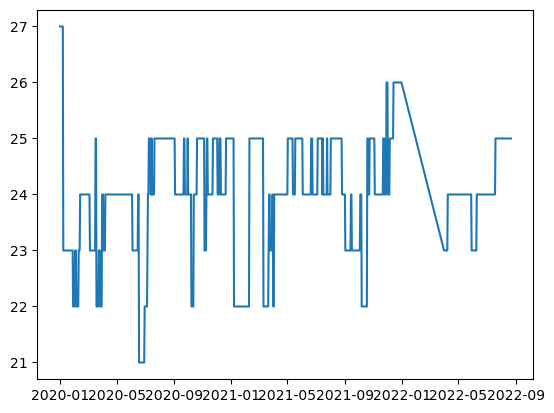

In [ ]:
test = data.entity_schedule.groupby('WORK_DATE', as_index=False)['IS_OPEN'].sum().sort_values('WORK_DATE')
plt.plot(test['WORK_DATE'], test['IS_OPEN'])

In [20]:
merged_.columns

Index(['WORK_DATE', 'DEB_TIME', 'DEB_TIME_HOUR', 'FIN_TIME',
       'ENTITY_DESCRIPTION_SHORT', 'WAIT_TIME_MAX', 'NB_UNITS',
       'GUEST_CARRIED', 'CAPACITY', 'ADJUST_CAPACITY', 'OPEN_TIME', 'UP_TIME',
       'DOWNTIME', 'NB_MAX_UNIT', 'show_or_parade', 'Bumper Cars',
       'Bungee Jump', 'Circus Train', 'Crazy Dance', 'Dizzy Dropper',
       'Drop Tower', 'Flying Coaster', 'Free Fall', 'Giant Wheel',
       'Giga Coaster', 'Go-Karts', 'Haunted House', 'Himalaya Ride',
       'Inverted Coaster', 'Kiddie Coaster', 'Merry Go Round', 'Oz Theatre',
       'PortAventura World', 'Rapids Ride', 'Roller Coaster',
       'Spinning Coaster', 'Spiral Slide', 'Superman Ride', 'Swing Ride',
       'Water Ride', 'Zipline'],
      dtype='object')

In [21]:
# TODO: also merge with entity_schedule to have number of parades that day (maybe it can help)

In [22]:
merged_1 = merged_.merge(data.parade_night_show_attendance, left_on='WORK_DATE', right_on='WORK_DATE', how='left')
merged_1.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,PortAventura World,Rapids Ride,Roller Coaster,Spinning Coaster,Spiral Slide,Superman Ride,Swing Ride,Water Ride,Zipline,Num_parade
0,2020-01-01,2020-01-01 21:00:00,21,2020-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
1,2020-01-01,2020-01-01 19:30:00,19,2020-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
2,2020-01-01,2020-01-01 22:30:00,22,2020-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
3,2020-01-01,2020-01-01 12:45:00,12,2020-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
4,2020-01-01,2020-01-01 17:00:00,17,2020-01-01 17:15:00,Skyway,5,15.0,92.0,211.500,198.25,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN


In [23]:
print("before merging : ", merged_.shape)
print("parade entity schedul pivot: ", data.parade_night_show_attendance.shape)
print("merged_: ", merged_1.shape)
print("joined: ", merged_1[merged_1['Num_parade'].notnull()].shape)

before merging :  (1996134, 41)
parade entity schedul pivot:  (597, 2)
merged_:  (1996134, 42)
joined:  (1244429, 42)


In [25]:
data.parade_night_show_attendance.head()

,WORK_DATE,Num_parade
0,2020-10-01,3
1,2020-10-02,3
2,2020-10-03,3
3,2020-10-04,3
4,2020-10-05,3


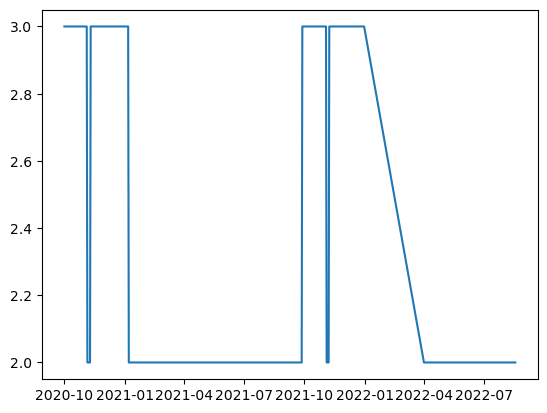

In [26]:
#test_parade_night_show_attendance = data.parade_night_show_attendance.groupby('WORK_DATE', as_index=False)['IS_OPEN'].sum().sort_values('WORK_DATE')
#test.head()
plt.plot(data.parade_night_show_attendance['WORK_DATE'], data.parade_night_show_attendance['Num_parade'])

In [27]:
merged_2 = merged_1.merge(data.entity_schedule, left_on=['WORK_DATE', 'ENTITY_DESCRIPTION_SHORT'], right_on=['WORK_DATE', 'ENTITY_DESCRIPTION_SHORT'], how='left')
merged_2.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,Rapids Ride,Roller Coaster,Spinning Coaster,Spiral Slide,Superman Ride,Swing Ride,Water Ride,Zipline,Num_parade,IS_OPEN
0,2020-01-01,2020-01-01 21:00:00,21,2020-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0
1,2020-01-01,2020-01-01 19:30:00,19,2020-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0
2,2020-01-01,2020-01-01 22:30:00,22,2020-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0
3,2020-01-01,2020-01-01 12:45:00,12,2020-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0
4,2020-01-01,2020-01-01 17:00:00,17,2020-01-01 17:15:00,Skyway,5,15.0,92.0,211.500,198.25,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [29]:
print("before merging : ", merged_1.shape)
print("parade entity schedule : ", data.entity_schedule.shape)
print("merged_: ", merged_2.shape)
print("joined: ", merged_2[merged_2['IS_OPEN'].notnull()].shape)

before merging :  (1996134, 42)
parade entity schedule :  (23595, 3)
merged_:  (1996134, 43)
joined:  (1217195, 43)
